<a href="https://colab.research.google.com/github/syp2889/python25study/blob/main/08_02_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 합성곱신경망의 전체 구조

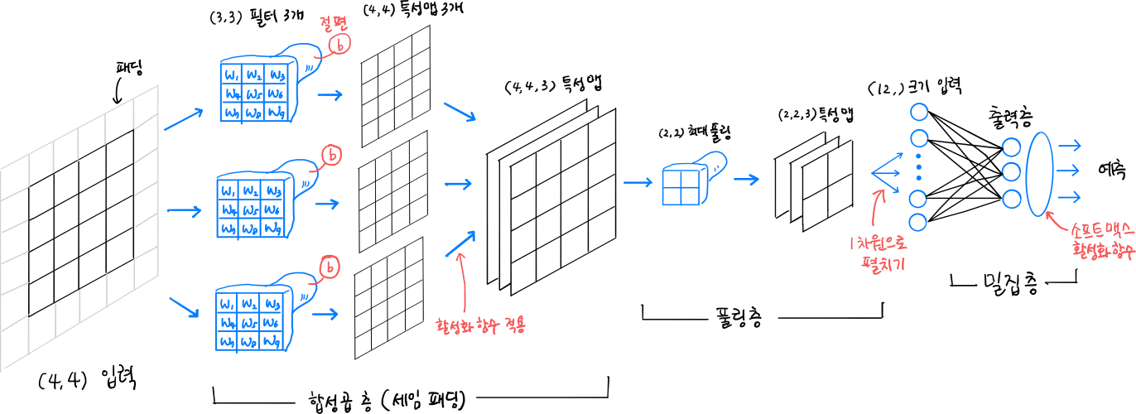

In [2]:
# 1. (4,4) 입력값에 패딩 1을 적용
# 2. 합성곱 에서 사용할 커널의 크기는 (3,3)크기이고 세임 패딩이 1이므로 1픽셀이 입력 데이터 주변에 추가
# 3. 이때 패딩은 텐서플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요가 없음
# 4. 패딩이 추가된 입력에서 합성곱이 수행됨

# 5. 합성곱의 필터는 3개임(각각 3,3 크기의 가중치를 가지고 있으며 필터마다 절편이 하나씩 있음)
# 6. 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다름, 합성곱의 스트라이드는 항상 1
# 7. 만들어지는 특성 맵의 크기는 입력과 동일한 (4,4), 3개의 필터가 하나씩 합성곱의 출력을 만들고 이 출력이 합쳐져서 (4,4,3) 크기의 특성맵 생성
# 8. 밀집층과 마찬가지로 합성곱 층에서도 활성화 함수를 적용함(합성곱 활성화 함수로 렐루사용)

# 9. 풀링층은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄임
# 10. 보통 (2,2)풀링을 사용해서 절반으로 줄임 (특성 맵의 개수는 변하지 않음(2,2,3))
# 10-1. 풀링을 사용하면 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이  더 나은 성능임

# 11. 밀집층인 출력층에서 전달하려면 3차원 배열을 1차원 배열로 펼쳐야 함. (Flatten 클래스)
#  >>> 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됨
# 12. 3개의 뉴런을 두었고 (3개의 클래스를 분류하는 다중분류)
#  >>> 출력층에서 계산된 값음 소프트맥스 활성화 함수를 거침 >>>> 최종 예측 확률이 됨.

In [ ]:
# 컬러이미지 인 경우!!!
# 컬러인 경우에는 RGB(빨, 녹, 파) 채널로 구현되어 있음
# 하나의 컬러 이미지는 너비와 높이, 차원 이외에 깊이 차원(채널 차원)이 있다. (4,4,3)이 되는 것!
# -> 마지막 3이 깊이

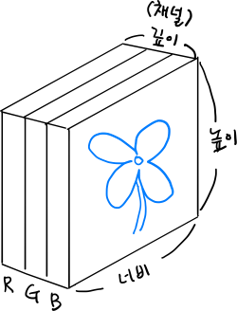

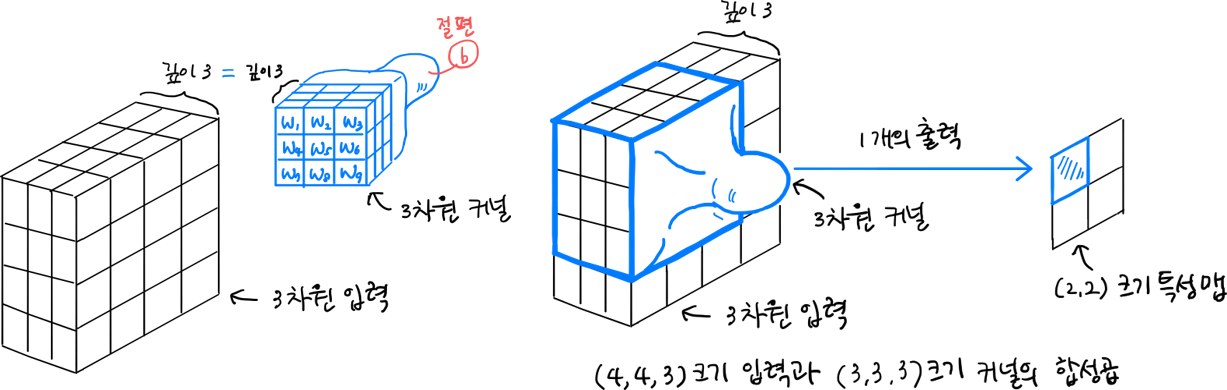

In [ ]:
# 깊이가 있는 입력에서 합성곱을 수행하기 위해서는 도장도 깊이가 필요합니다.
# 즉 커널의 크기가 (3,3)이 아니라 (3,3,3)이 됨

# 커널 배열의 깊이는 항상 입력의 깊이와 같아요
# 합성곱의 계산은(3,3,3) 영역에 해당하는 27개의 원소에 27개의 가중치를 곱하고 절편을 더하는 식
# 기본적으로 2차원 합성곱과 같지만 도장이 입력의 깊이만큼 쏙 들어간다고 생각해봄
# 결론은 입력이나 필터의 차원이 몇개인지 상관없이 항상 출력은 하나의 값 (특성 맵에 있는 한 원소가 채워짐)

# 케라스의 합성곱 층은 원래 3차원 입력을 준비한다.
# (우리가 흑백이미지인 MNIST를 예제로 사용해서 그렇지 원래는 모두 컬러)
# (28,28,1) 크기의 3차원 배열로 변환 (원소 개수는 동일하면서 차원만 맞춤)

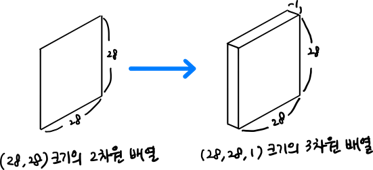

In [ ]:
# 이와 비슷한 경우는 합성곱 층-풀링 층 다음에 다시 또 합성곱 층이 올 때
# 첫 번째 합성곱 층의 필터 개수가 5개라고 가정하여
# 첫 번째 풀링 층을 통과한 특성 맵의 크기가 (4,4,5)라고 했을 때,
# 두 번째 합성곱 층에서 필터의 너비와 높이가 각각 3이라면 이 필터의 커널 크기는 (3,3,5) 가 됨
# 이유: 입력의 깊이와 필터의 깊이는 같아야 함.(3 * 3 * 5 = 45개의 가중치를 곱하고 절편을 더함)
#       >>>합성곱의 결과는 1개의 출력

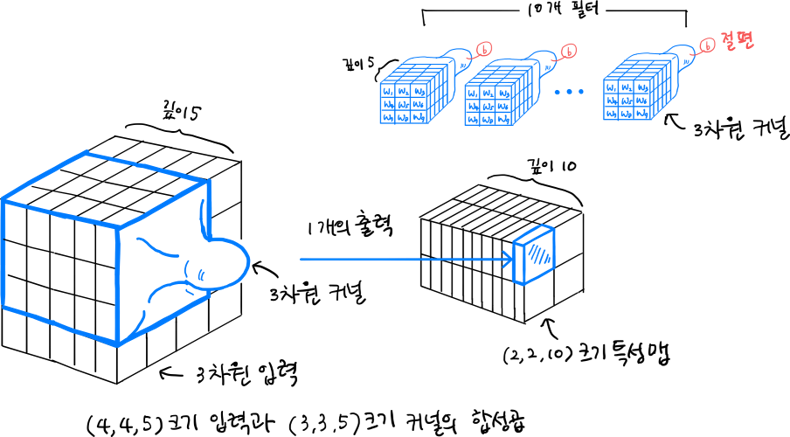

In [ ]:
# 두 번째 합성곱 층의 필터 개수가 10개라면 만들어진 특성 맵의 크기는 (2,2,10)이 됨
# 이렇게 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징
# 마지막에 출력층 전에 특성 맵을 모두 펼쳐서 밀집층의 입력으로 사용

# 합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾아요
# 처음에는 간단한 기본적인 특징(직선, 곡선 등)을 찾고 층이
# 깊어질 수록 다양하고 구체적인 특징을 감지할 수 있으도록 필터의 개수를 늘림

# 또 어떤 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지 할 수 있도록 너비와 높이 차원을
# 점점 줄여가는 것이 합성곱 신경망의 목표임
########################CNN이론 끝 =========================================

In [ ]:
# 합성곱 신경망을 사용한 이미지 분류 실습

# 전에 배운 합성곱 ,필터 ,패딩 ,스트라이드 풀링 등은 직접 계산할 필요가 없어요
# 케라스 API가 알아서 하니깐요. 그러나 개념과 들어가는 기능에 대한 느낌을 알아야 최적의 결과를 얻을 수 있겠죠?
# 그래서 동작원리를 터득하고 특히 다른 신경망 구조를 만나도 잘 적응할 수 있어요

# 패션 MNIST를 활용하여 응용해봅시다.
# 전처리 : 데이터 스케일을 0~255 사이에서 0~1사이로 바꾸고 훈련 세트와 검증 세트로 나눠요
# 차이점은 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 해요
#       (넘파이 reshape(), Flatten 사용) 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 할 필요가 없어요
#     입력이미지는 항상 깊이(채널)차원이 있어야해요.

# 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해
# 마지막에 이 채널 차원을 추가해야 해요.
# 넘파이 reshape() 메서드를 이용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가해요.

In [1]:
import tensorflow as tf
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
tf.keras.utils.set_random_seed(42)

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target)=\
  keras.datasets.fashion_mnist.load_data() # 패션 MNIST 데이터 불러오기

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# train_input(48000,28,28) >> train_scaled(48000,28,28,1)로 4차원 변경 됨 (마지막차원은 흑백이라 1)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# 훈련 데이터, 검증 데이터, 훈련타겟, 검증타겟 >>8:2

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 활성곱 신경망 만들기 : 합성곱 층으로 이미지에서 특징을 감지한 후
# 밀집층으로 클래스에 따른 분류 확률을 계산함

model = keras.Sequential()
model.add(keras.layers.Conv2D(
    32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
#                      Conv2D 층을 add로 추가
#   32 : 뉴런 개수임. 합성곱 층으로 32개의 필터를 사용
#      kernel_size=3 : 커널의 크기는 (3,3)
#                     activation = 'relu' : 렐루 활성화 함수사용
#                                        padding='same' : 세임 패딩 사용
#                                                        input_shape=(28,28,1) : 앞에 변경한 이미지를 차원 변경함 (rgb면 1이 아니고 3)
# 결론 : 28 * 28 * 32 의 출력 >>> 풀링으로 압축 (14 * 14 * 32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


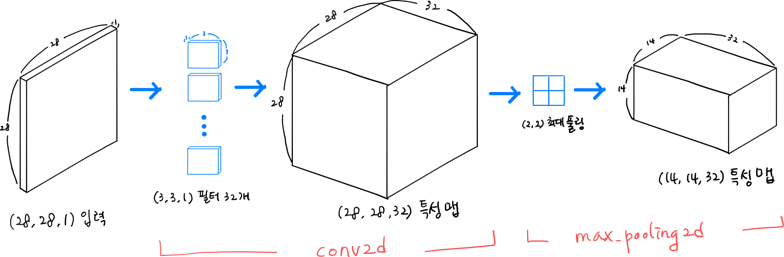

In [3]:
model.add(keras.layers.MaxPooling2D(2))
# 풀링 층 추가 (최대 풀링 (2:2) 특성 맵의 크기는 절반으로 줄어듬)
# 합성 곱 층에서 32개의 필터를 사용했기 때문에 특성 맵의 깊이는 32
# 최대풀링을 통과한 특성 맵의 크기는 (14,14,32)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# 이번 합성곱 층은 세임 패딩을 사용 (입력의 가로 세로 크기를 줄이지 않음)
model.add(keras.layers.MaxPooling2D(2))
# 이어지는 풀링 층에서 이 크기를 절반으로 줄임
# 64개의 필터를 사용했으니 특성맵을 크기는 (7,7,64)
model.summary()
# 결론 픽셀의 크기는 7,7로 줄어들지만 깊이는 64로 깊어진다.
# 깊이가 깊어진다는 뜻은 특성을 세세하게 파악한다. (이미지를 확대하여 특성을 깊게 본다.)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

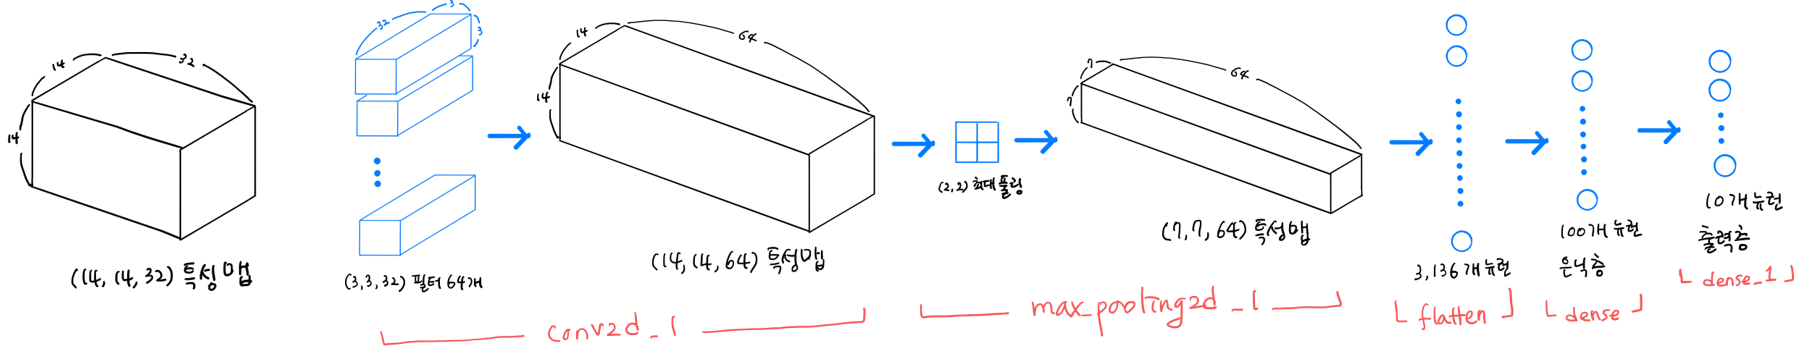

In [5]:
# 3차원 특성 맵을 일렬로 펼칠 차례
# >> 마지막에 10개의 뉴런을 가진 밀집 층에서 확률을 계산
# 이번에는 특성맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고
# 중간에 하나의 밀집 은닉층을 하나 추가해요
# Flatten >>> Dense 은닉층 >> Dropout >> Dense 출력층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
# 은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱과 같은 렐루 사용
model.add(keras.layers.Dropout(0,4))
# 드롭아웃을 이용해 은닉층의 과대적합을 막아 성능을 조금 개선
model.add(keras.layers.Dense(10, activation='softmax'))
# 패션 MNIST는 클래스를 10개로 분류하는 다중 분류 문제임으로 활성화 함수는 소프트맥스 사용
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 합성곱 층과 풀링 층의 효과를 확인할 수 있어요
# 첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 됨
# 두 번째 합성곱 층을 통과하면서 특성 맵의 크기가 64로 늘어남
# 반면 특성 맵의 가로세로 크기는 첫 번째 풀링 층에서 절반으로 줄어들고
# 두 번째 풀링에서 다시 절반으로 줄어듬. 따라서 최종 특성 맵의 크기는 (7,7,64)임

# 완전 신경망에서 했던 것처럼 모델 파라미터 개수는 첫 번째 합성곱 층은
# 32개의 필터를 가지고 있고 크기가(3,3) 깊이가 1이고 필터마다 1의 절편이 있어요
# 3*3*1*32=320의 파라미터

# 두 번째 합성곱 층은 64개의 필터를 사용하게 크기가 (3,3)
# 깊이가 32이고 필터마다 1의 절편이 있어요
# 3*3*32*64+64=18496의 파라미터

# Flatten 클래스의 (7,7,64)크기의 특성 맵을 1차원 배열로 펼치면
# (3136,)의 크기에 배열이 됨. 이를 100개의 뉴런과 완전히 연결해야 함으로
# 은닉층의 모델 파라미터 개수 >> 3136*100+100 = 313700의 파라미터

# 마지막 출력층의 모델 파라미터 개수는 1010개

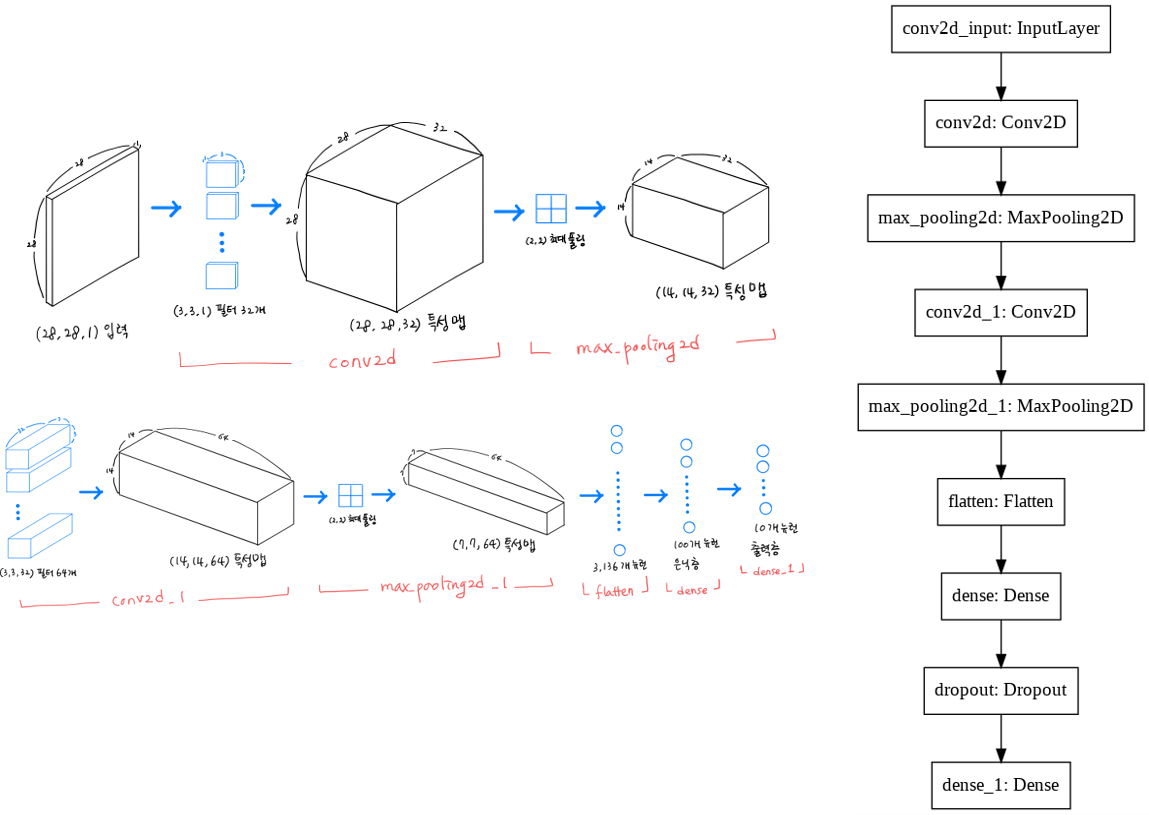

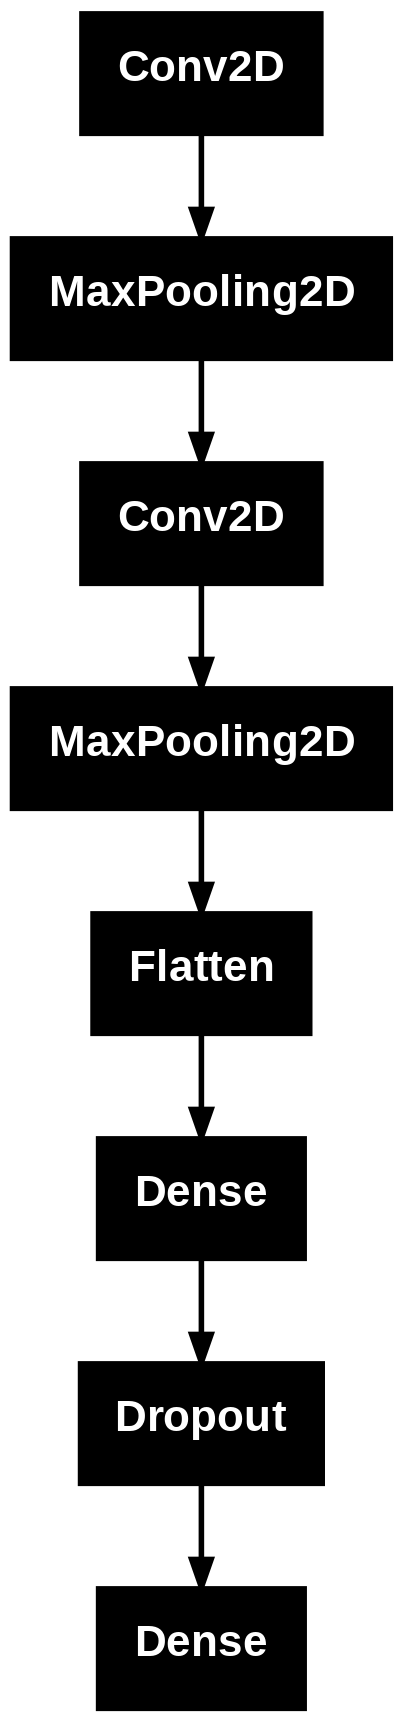

In [6]:
# 케라스는 층의 구성을 그림으로 보여주는 메서드가 있어요 (keras.utils.plot_model)
keras.utils.plot_model(model) # 버전차이

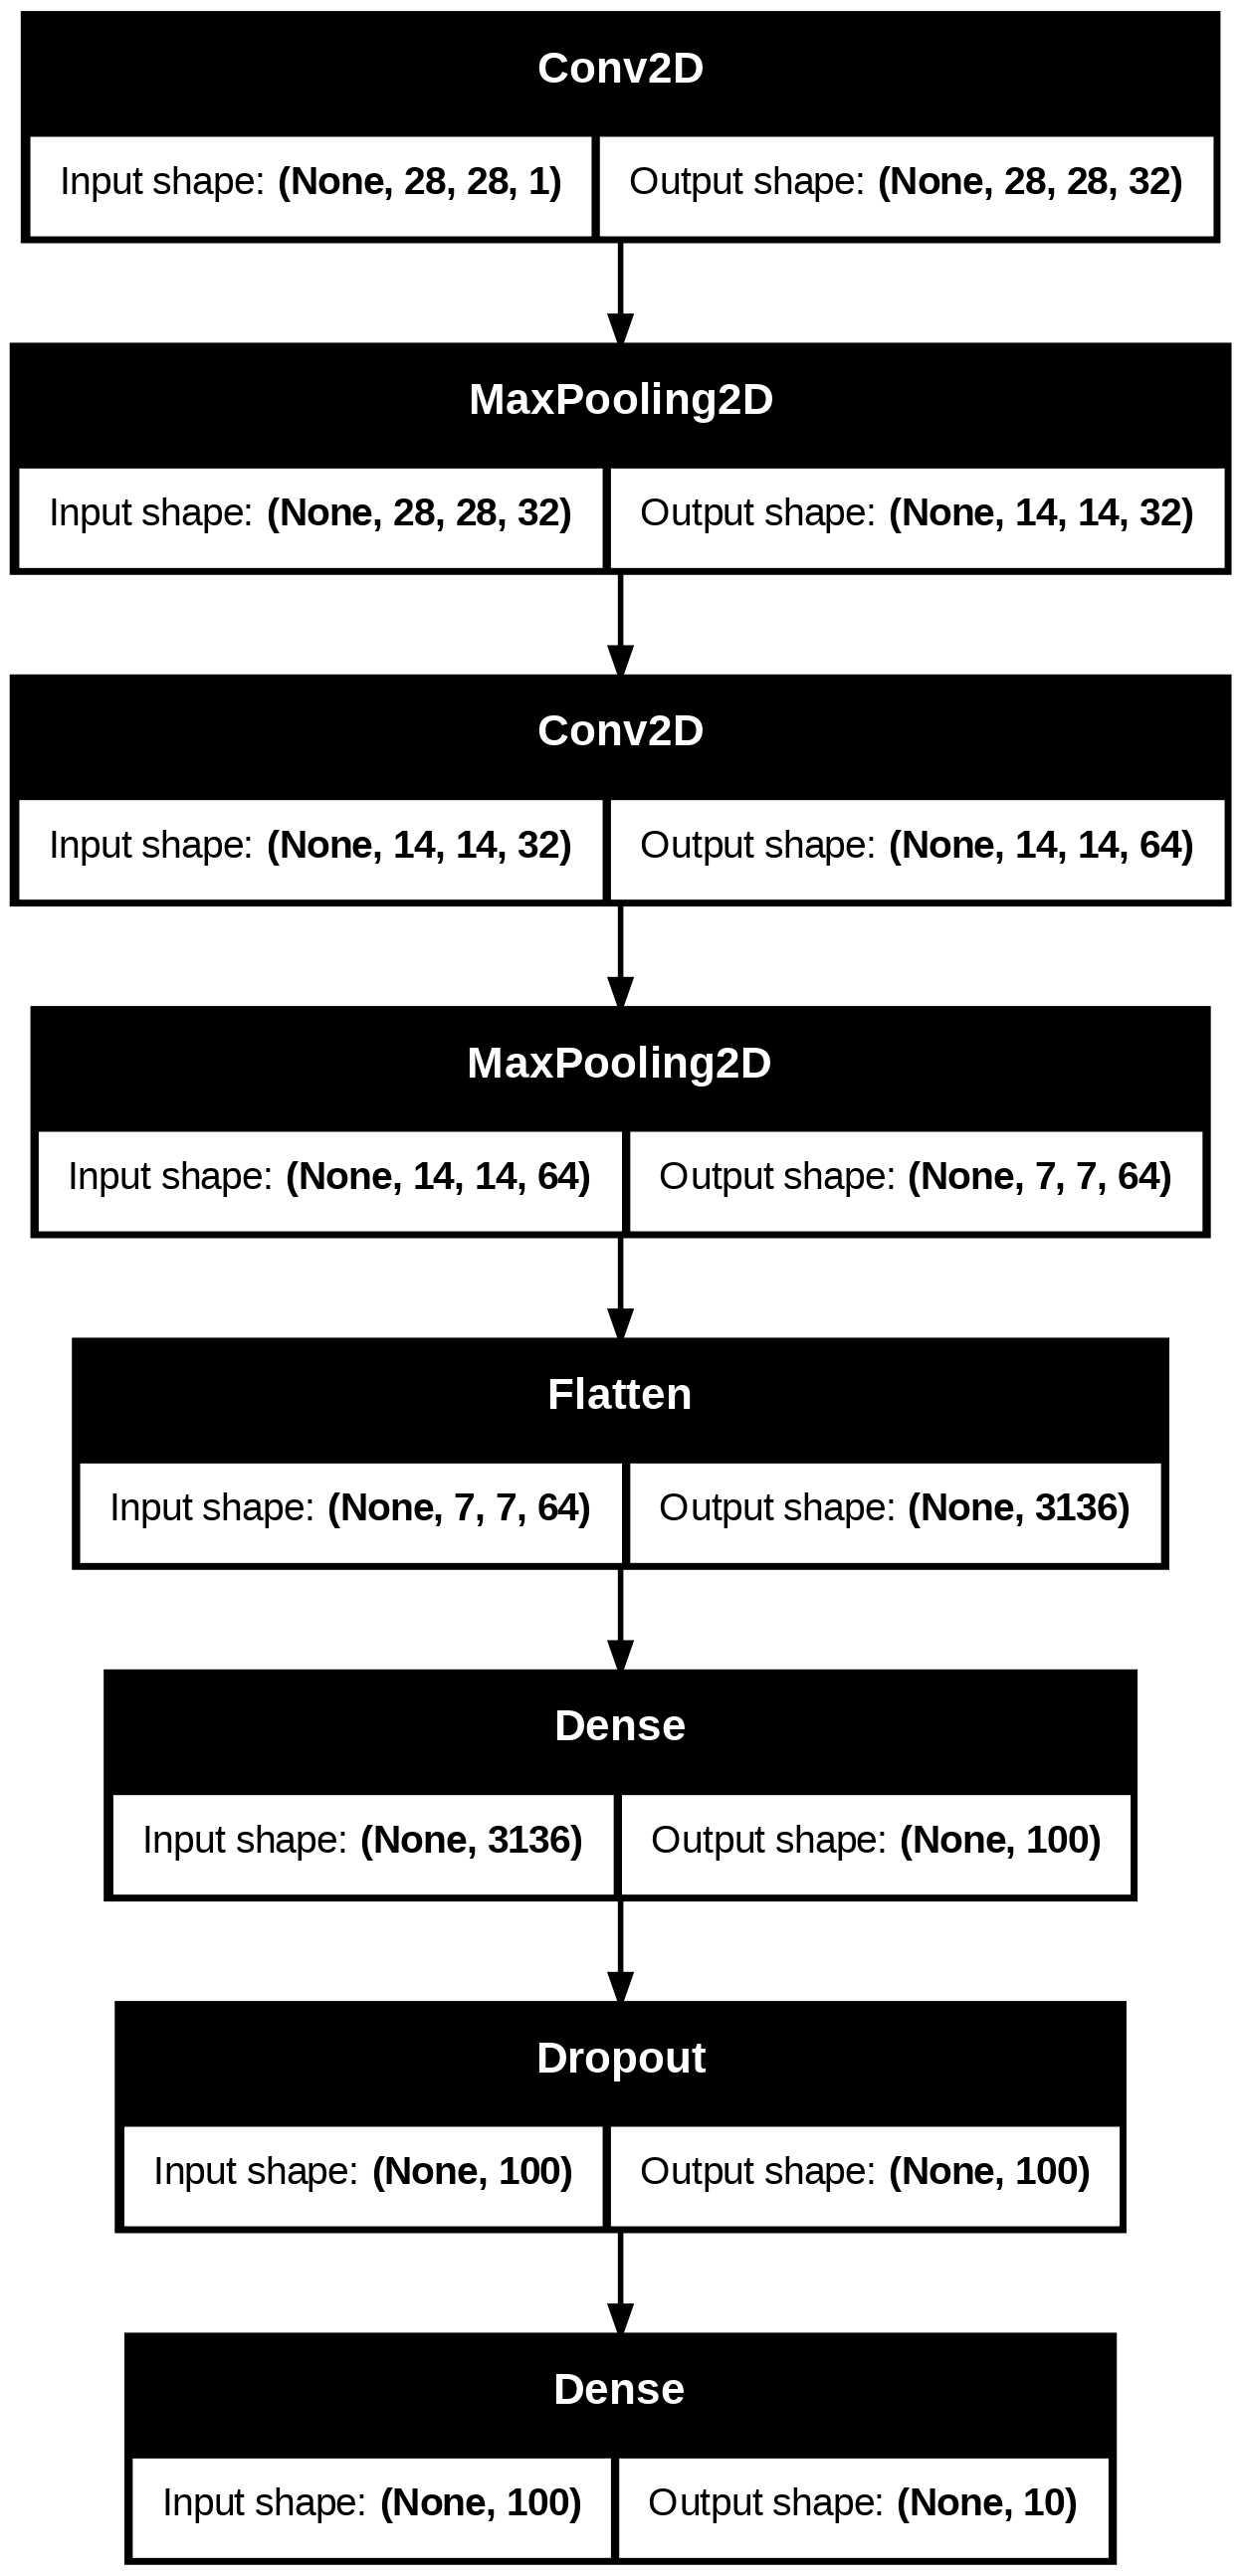

In [7]:
keras.utils.plot_model(model, show_shapes=True) # 입력과 출력 크기를 표시

In [12]:
# 패션 MNIST 데이터에 적용할 합성곱 신경망 모델의 구성 끝 -> 컴파일하고 훈련 진행 시작!

# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 아담 최적화로 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
# ModelCheckpoint 콜백 조기종료 -> 검증이 2번 정도 상향시 조기 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
# EarlyStopping 콜백 조기 종료
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 11분 걸림 엥 난 6번밖에 안했네?

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.7862 - loss: 0.5897 - val_accuracy: 0.8888 - val_loss: 0.3102
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8942 - loss: 0.2919 - val_accuracy: 0.9030 - val_loss: 0.2689
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.9127 - loss: 0.2380 - val_accuracy: 0.9062 - val_loss: 0.2631
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9245 - loss: 0.2010 - val_accuracy: 0.9098 - val_loss: 0.2553
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9369 - loss: 0.1688 - val_accuracy: 0.9111 - val_loss: 0.2647
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9478 - loss: 0.1405 - val_accuracy: 0.9149 - val_loss: 0.2572


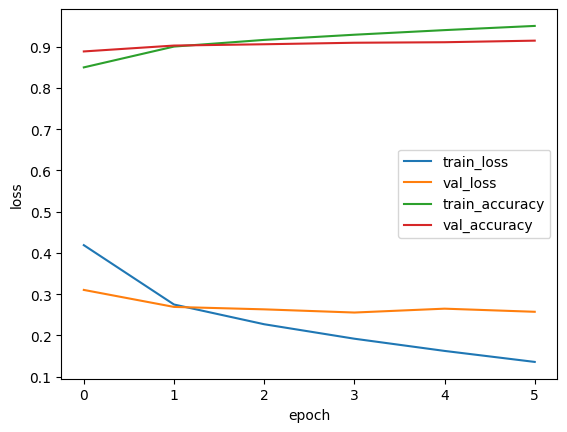

In [13]:
# 훈련세트 성능이 나는 94.78% 나왔네
# 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 확인해봅시다.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss','train_accuracy','val_accuracy'])
plt.show()

In [14]:
# EarlyStopping 클래스에서 restorte_best_weights=True로 지정해서
# 현재 model 객체가 최적의 모델 파라미터로 복원됐어요
# ModelCheckpoint 콜백이 저장한 best-cnn-model.keras 파일을 다시 읽을 필요가 없음

# 이번 세트에 대한 성능 평가 진행
model.evaluate(val_scaled, val_target)
# 이 결과는 fit() 메서드의 출력 중 다섯번째 출력과 비슷함
# EarlyStopping 콜백이 model 객체의 최상의 모델 파라미터로 잘 복원 함

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9126 - loss: 0.2444


[0.2553362250328064, 0.9098333120346069]

In [15]:
# 맨 처음 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 파악해봅시다.
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
# 훈련세트와 검증 세트에서 했던 것 처럼 픽셀 값의 범위를
# 0~1 사이로 바꾸고 이미지 크기를 (28,28,1)로 변경

model.evaluate(test_scaled, test_target)
# 테스트 세트에서 점수는 검증 세트보다 조금 작음
# 이 모델을 실전에 투입하면 90% 이상의 성능을 기대할 수 있음

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9012 - loss: 0.2901


[0.2776869237422943, 0.902999997138977]

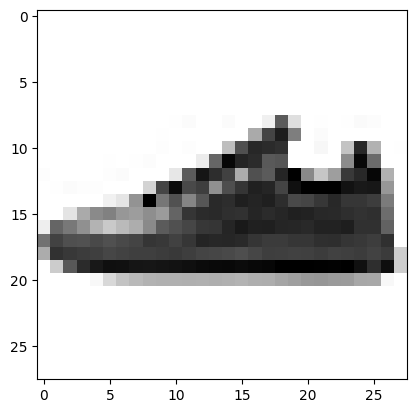

In [30]:
# 편의상 검증 세트의 첫 번째 샘플인 이미지를 활용해봅시다.
# 맷플롯립에서 흑백 이미지에 깊이 차원은 없어요
# >> (28,28,1) 크기를 (28,28)로 변경, reshape(28,28)
plt.imshow(val_scaled[777].reshape(28,28), cmap='gray_r')
# 첫번째 샘플인 val_scaled[0]
plt.show() # 검증용리스트의 777번에 있는 이미지를 출력했어요

In [31]:
# 확률 예측 시도 predict() 메서드는 10개의 클래스에 대한 예측 확률을 출력해요
preds=model.predict(val_scaled[777:778])
print(preds)

# 결과를 보면 0번째 값이 1로 판단되고 나머지는 지수형식으로 나왔는데
# e-가 있으면 마이너스 임(0에 가까움)
# 5e3 -> 5x10^3
# 5e-3 -> 5x10^-3
# [[3.0354818e-16 2.0498499e-21 4.4698989e-19 1.5067686e-19 7.0234020e-18
#   8.2857021e-17 4.4651635e-18 6.6868857e-19 1.0000000e+00 1.9831414e-20]]
# ['티셔츠',     '바지',       '스웨터',      '드레스',     '코트',
#  '샌달',       '셔츠',       '스니커즈',    '가방',       '앵클 부츠']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[6.7124155e-08 9.6860166e-11 5.3565594e-07 4.9021179e-07 3.0772542e-09
  1.8481296e-05 4.2681010e-09 9.9982244e-01 7.0871550e-08 1.5791986e-04]]


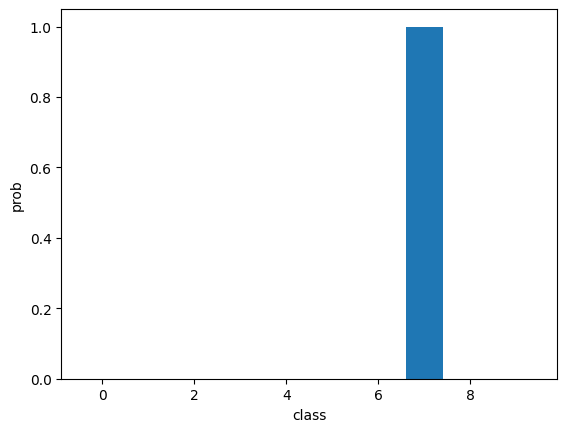

In [32]:
# 막대그래프로 표시
plt.bar(range(0,10),preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [33]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']
# 레이블추가

In [34]:
import numpy as np
print(classes[np.argmax(preds)])

스니커즈
